In [1]:
##import libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# loading datasets
covid = pd.read_csv('Covid_19_Dataset.csv')

C:\TEMP\ipykernel_5704\971061827.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv('Covid_19_Dataset.csv')


In [3]:
covid.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [4]:
covid = covid.drop(columns=['test_date'], errors='ignore')

In [5]:
covid.isnull().sum()

cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         1
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64

In [6]:
# Fill NaN in 'age_60_and_above' with 'unknown' or 'No'
covid['age_60_and_above'] = covid['age_60_and_above'].fillna('No')

# If gender has missing values, fill with 'unknown'
covid['gender'] = covid['gender'].fillna('unknown')

In [7]:
# Convert categorical features to numeric
covid['age_60_and_above'] = covid['age_60_and_above'].replace({'Yes': 1, 'No': 0, 'unknown': 0})
covid['gender'] = covid['gender'].replace({'male': 1, 'female': 0, 'unknown': 2})
covid['test_indication'] = covid['test_indication'].astype('category').cat.codes  # auto encode

# Encode target column
covid['corona_result'] = covid['corona_result'].replace({'positive': 1, 'negative': 0, 'other': 2})


C:\TEMP\ipykernel_5704\953239632.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid['age_60_and_above'] = covid['age_60_and_above'].replace({'Yes': 1, 'No': 0, 'unknown': 0})
C:\TEMP\ipykernel_5704\953239632.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid['gender'] = covid['gender'].replace({'male': 1, 'female': 0, 'unknown': 2})
C:\TEMP\ipykernel_5704\953239632.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

In [8]:
# Convert only numeric-looking columns safely
for col in covid.columns:
    try:
        covid[col] = pd.to_numeric(covid[col])
    except Exception:
        pass


In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                278596 non-null  float64
 1   fever                278596 non-null  float64
 2   sore_throat          278847 non-null  float64
 3   shortness_of_breath  278847 non-null  float64
 4   head_ache            278847 non-null  float64
 5   corona_result        278848 non-null  int64  
 6   age_60_and_above     278848 non-null  int64  
 7   gender               278848 non-null  int64  
 8   test_indication      278848 non-null  int8   
dtypes: float64(5), int64(3), int8(1)
memory usage: 17.3 MB


In [10]:
covid.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0.0,0.0,0.0,0.0,0.0,0,0,0,2
1,1.0,0.0,0.0,0.0,0.0,0,0,0,2
2,0.0,1.0,0.0,0.0,0.0,0,0,1,2
3,1.0,0.0,0.0,0.0,0.0,0,0,0,2
4,1.0,0.0,0.0,0.0,0.0,0,0,1,2


In [11]:
covid.isnull().sum()

cough                  252
fever                  252
sore_throat              1
shortness_of_breath      1
head_ache                1
corona_result            0
age_60_and_above         0
gender                   0
test_indication          0
dtype: int64

In [12]:
covid.shape

(278848, 9)

In [13]:
covid = covid.fillna(covid.mean(numeric_only=True))

In [14]:
covid.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [15]:
covid.shape

(278848, 9)

In [16]:
covid.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000,278848.000000
mean,0.151574,0.078077,0.006907,0.005655,0.008657,0.080736,0.092613,0.603386,1.779181
std,0.358446,0.268172,0.082821,0.074990,0.092640,0.319582,0.289890,0.616138,0.595588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


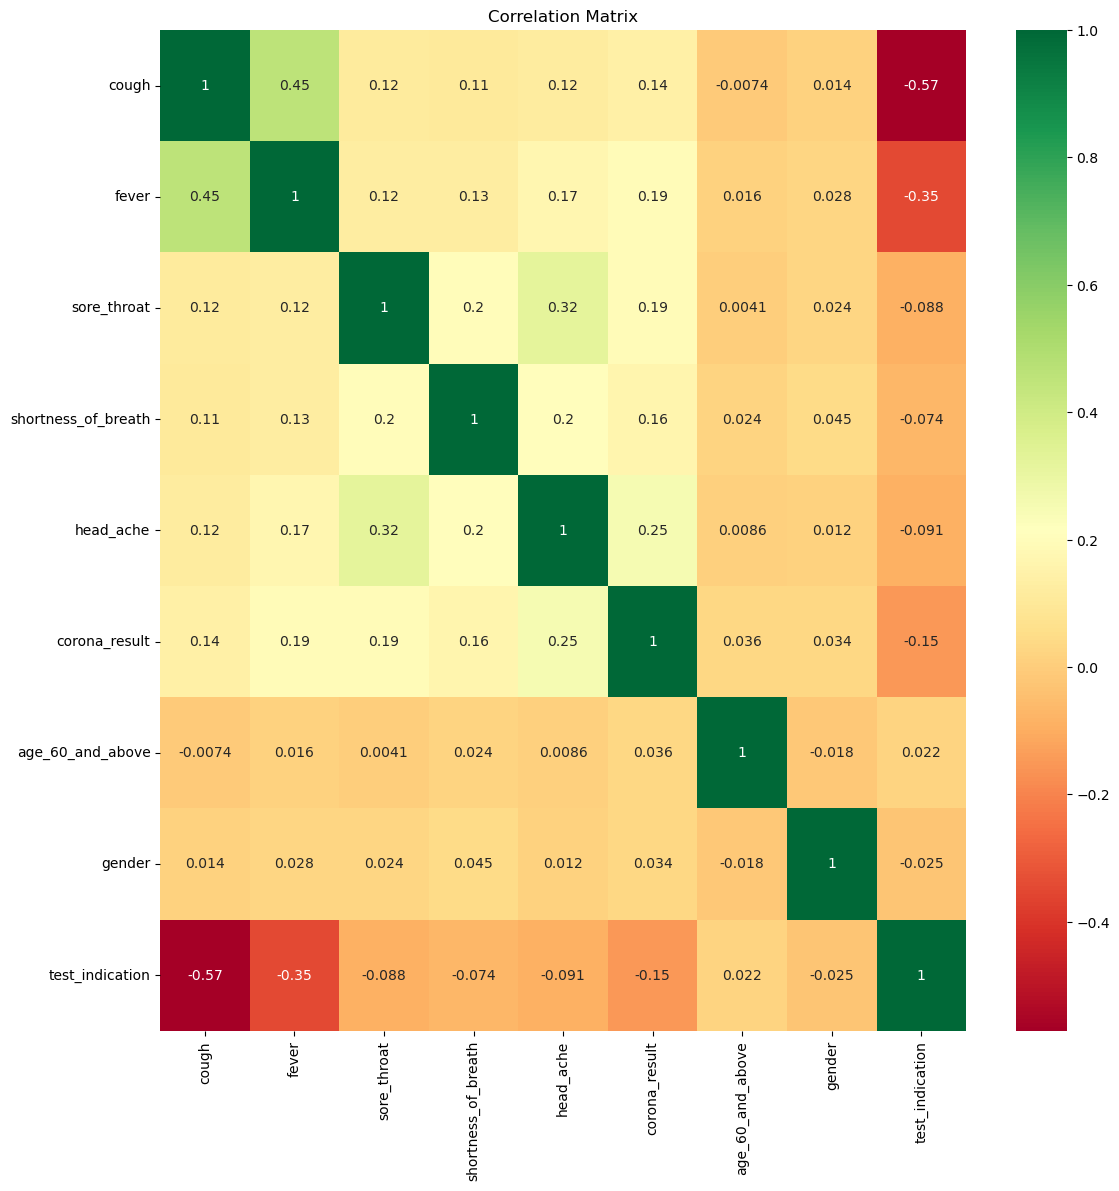

In [17]:
#correlation matrix
plt.figure(figsize=(13,13))
sns.heatmap(covid.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix")
plt.show()

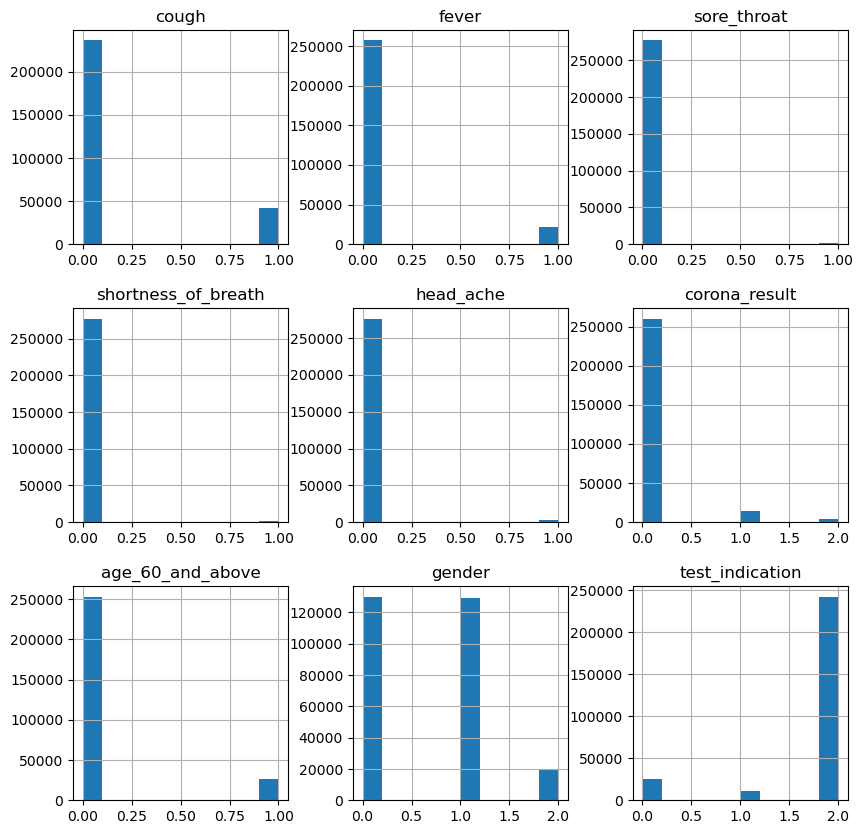

In [18]:
covid.hist(figsize=(10,10))
plt.show()

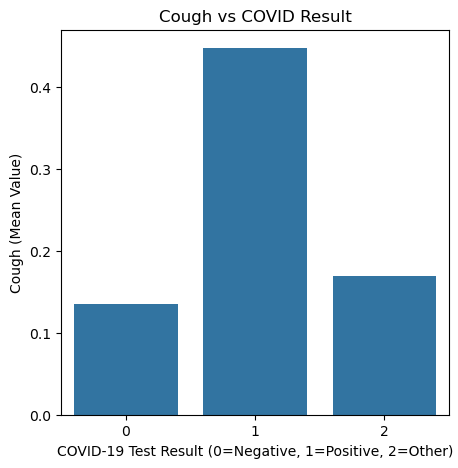

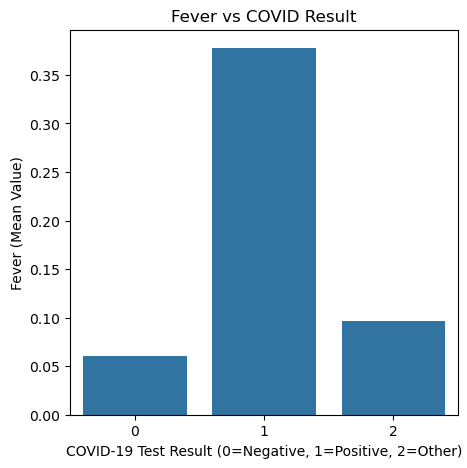

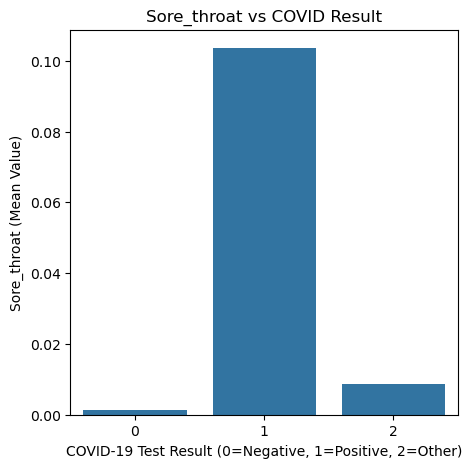

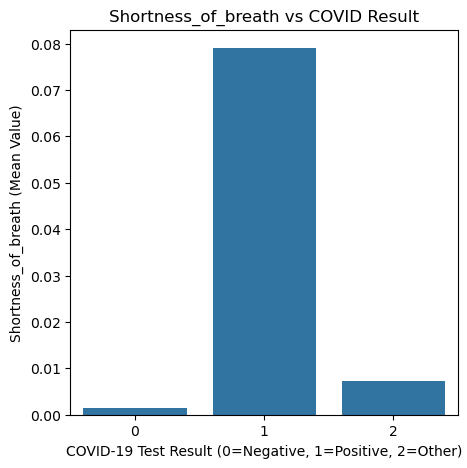

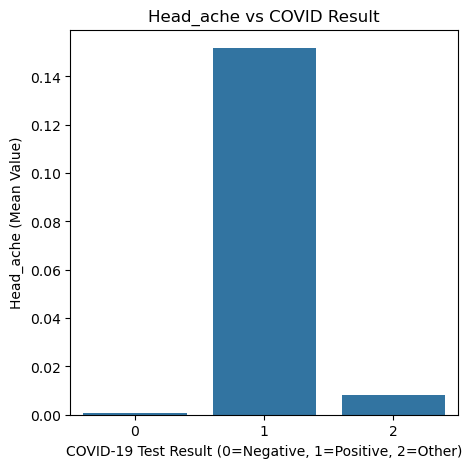

In [19]:
symptoms = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']
for s in symptoms:
    plt.figure(figsize=(5,5))
    sns.barplot(x='corona_result', y=s, data=covid, errorbar=None)
    plt.title(f"{s.capitalize()} vs COVID Result")
    plt.xlabel("COVID-19 Test Result (0=Negative, 1=Positive, 2=Other)")
    plt.ylabel(f"{s.capitalize()} (Mean Value)")
    plt.show()

In [20]:
##importing sklearn libraries and FEATURE-SCALING 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X = covid.drop(columns=['corona_result'])
y = covid['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42,stratify=y  )

In [22]:
X_train

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
21463,0.0,0.0,0.0,0.0,0.0,0,1,2
253929,1.0,1.0,0.0,0.0,0.0,0,0,0
99454,1.0,0.0,0.0,0.0,0.0,0,0,0
137607,0.0,0.0,0.0,0.0,0.0,0,1,2
23811,0.0,0.0,0.0,0.0,0.0,0,1,2
...,...,...,...,...,...,...,...,...
171063,0.0,0.0,0.0,0.0,0.0,0,1,2
86350,0.0,0.0,0.0,0.0,0.0,0,1,2
76931,0.0,0.0,0.0,0.0,0.0,0,1,2
38375,0.0,0.0,0.0,0.0,0.0,0,1,2


In [23]:
y_train

21463     0
253929    0
99454     0
137607    0
23811     0
         ..
171063    0
86350     0
76931     0
38375     0
18571     0
Name: corona_result, Length: 186828, dtype: int64

In [24]:
y_train.shape

(186828,)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
##Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print("Shapes check before scaling:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
results = {}

Shapes check before scaling:
X_train: (186828, 8)
X_test: (92020, 8)
y_train: (186828,)
y_test: (92020,)


In [28]:
## Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'predictions': lr_pred,
    'report': classification_report(y_test, lr_pred)
}
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred)*100)
print(classification_report(y_test, lr_pred))

🔹 Logistic Regression Accuracy: 94.29906542056075
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     85875
           1       0.83      0.23      0.36      4861
           2       0.00      0.00      0.00      1284

    accuracy                           0.94     92020
   macro avg       0.59      0.41      0.44     92020
weighted avg       0.93      0.94      0.92     92020



In [29]:
##Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'predictions': rf_pred,
    'report': classification_report(y_test, rf_pred)
}
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, rf_pred)*100)
print(classification_report(y_test, rf_pred))

🔹 Random Forest Accuracy: 95.48467724407737
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85875
           1       0.79      0.55      0.64      4861
           2       0.00      0.00      0.00      1284

    accuracy                           0.95     92020
   macro avg       0.58      0.51      0.54     92020
weighted avg       0.94      0.95      0.95     92020



In [30]:
## XGBoost Classifier 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, xgb_pred),
    'predictions': xgb_pred,
    'report': classification_report(y_test, xgb_pred)
}
print("🔹 XGBoost Accuracy:", accuracy_score(y_test, xgb_pred)*100)
print(classification_report(y_test, xgb_pred))

🔹 XGBoost Accuracy: 95.48793740491197
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85875
           1       0.79      0.55      0.65      4861
           2       0.00      0.00      0.00      1284

    accuracy                           0.95     92020
   macro avg       0.58      0.51      0.54     92020
weighted avg       0.94      0.95      0.95     92020



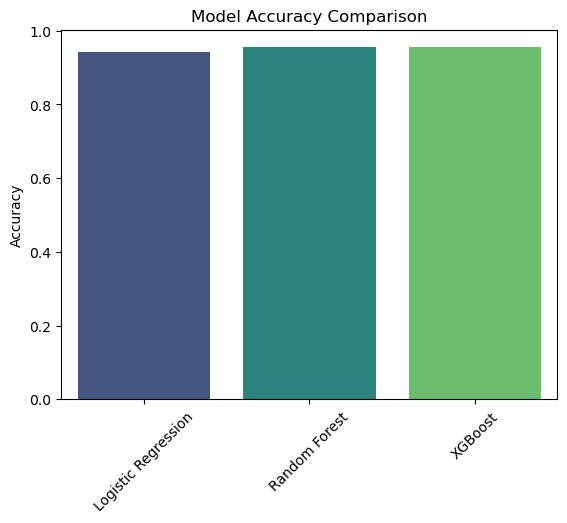

In [31]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [32]:
##Select Best Model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model_acc = results[best_model_name]['accuracy']

print("\n🏆 Best Model:", best_model_name, "with Accuracy:", best_model_acc*100)


🏆 Best Model: XGBoost with Accuracy: 95.48793740491197


In [38]:
import pickle

with  open('covid_logistic.pkl', 'wb') as lr_file: 
      pickle.dump(lr, lr_file)


In [37]:
import pickle

with open('covid_random.pkl', 'wb') as rf_file:
     pickle.dump(rf, rf_file)


In [35]:
import pickle

# Suppose 'xgb' is your trained XGBClassifier
with open('covid_xgb.pkl', 'wb') as xgb_file:
    pickle.dump(xgb, xgb_file)
